# Expectations Decider

### 1. What is Probability?
 - Probability is a measure of how likely an event is to occur. 
 - It ranges from 0 to 1, where 0 means the event will not occur and 1 means the event will certainly occured.
 - In this project, probability helps us quantify how likely a student is to pass the final exam based on past data.red..


### 2. Key Probability Terminology
 -  **Experiment**: The process of observing student outcomes.
 - **Sample Space**: All possible outcomes (Pass or Fail).
 - **Event**: A specific outcome or condition.
 - **Probability of an Event**: Number of favorable outcomes divided by total outcomes.
 - **Conditional Probability**: Probability of an event given another event has occurred.

## Import Libraries

In [109]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

## Load Data

In [19]:
df = pd.read_csv("student_performance_dataset.csv")
df.head()

,study_hours,attendance,group_discussion,previous_test_score,final_exam_pass
0,39,60,Yes,60,Pass
1,33,87,No,54,Fail
2,3,52,No,35,Fail
3,12,54,Yes,67,Pass
4,34,95,No,40,Fail


### 3. Probability Event Examples from the Dataset

In [90]:
# Event A: Student passes exam
event_pass = df[df["final_exam_pass"] == "Pass"]

# Event B: Student attends > 80%
event_attendance = df[df["attendance"] > 80]

# Event C: Participates in group discussion
event_group = df[df["group_discussion"] == "Yes"]


# Types of Event 

### (A) Empirical Probability

**Defination**:
- Empirical probability is calculated using observed data from the dataset.

**Formula**:

$$
\text{Empirical Probability} = \frac{\text{Number of times event occurs}}{\text{Total number of trials}}
$$


In [92]:
prob_pass = len(event_pass) / len(df)
prob_pass

0.485

### (B) Theoretical Probability

**Definition**:
- Theoretical probability is calculated using logical reasoning assuming all outcomes are equally likely.

**Formula**:

$$
\text{Theoretical Probability} = \frac{\text{Number of favourable outcomes}}{\text{Total number of possible outcomes}}
$$


In [17]:
theoretical_prob = 1 / 2
theoretical_prob

0.5

## Random Variable & Probability Distribution

### Random Variable
- A Random Variable is a variable whose value depends on the outcome of a random experiment.
It assigns numerical values to the outcomes.
- A random variable is a numerical value that represents the outcome of a
random experiment.
- Random variables are usually denoted by capital letters like X, Y.


### Types of Random Variable
1. Discrete Random Variable  
   - Takes countable values  
   - Example: Number of heads in coin tosses  

2. Continuous Random Variable  
   - Takes values in a continuous range  
   - Example: Height, weight, time


### Probability Distribution Table
- A Probability Distribution describes how probabilities are distributed over the values
of a random variabl
- A probability distribution shows all possible values of a random variable
and their corresponding probabilities.
- For this dataset, the probability distribution of **X** is based on the
number of students who pass or fail the final exam.


In [163]:
pass_counts = df["final_exam_pass"].value_counts()
pass_counts

final_exam_pass
Fail    103
Pass     97
Name: count, dtype: int64

In [21]:
prob_dist = pass_counts / len(df)
prob_dist

final_exam_pass
Fail    0.515
Pass    0.485
Name: count, dtype: float64

### Mean & Variance 

In [23]:
mean = np.mean(df["final_exam_pass"] == "Pass")
variance = np.var(df["final_exam_pass"] == "Pass")

mean, variance

(0.485, 0.249775)

##  Venn Diagram in Probability

### Definition

A Venn diagram is a visual representation used to show the relationship
between two or more events in probability.

It helps to understand:
- Union of events
- Intersection of events
- Overlapping and non-overlapping outcomes

In [117]:
A = df[df["study_hours"] > 10]
B = df[df["attendance"] > 80]

A_and_B = df[(df["study_hours"] > 10) & (df["attendance"] > 80)]

len(A), len(B), len(A_and_B)

(149, 82, 62)

In [121]:
A_only = len(A) - len(A_and_B)
B_only = len(B) - len(A_and_B)
AB = len(A_and_B)

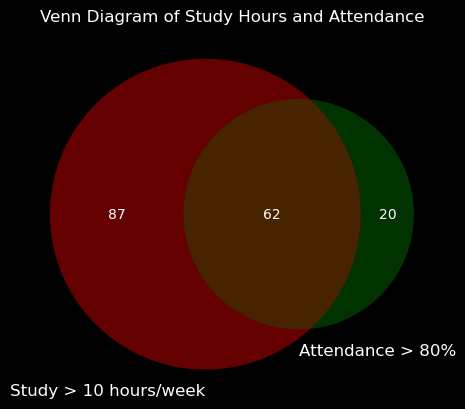

In [138]:
plt.figure()

venn2(
    subsets=(A_only, B_only, AB),
    set_labels=("Study > 10 hours/week", "Attendance > 80%")
)

plt.title("Venn Diagram of Study Hours and Attendance")
plt.show()


## Contingency Table & Probability Calculations

### Definition

A contingency table is a table used to display the frequency distribution
of two categorical variables at the same time.

It helps to analyze the relationship between two events and is used to
calculate joint, marginal, and conditional probabilities.


In [132]:
contingency_table = pd.crosstab(
    df["group_discussion"],
    df["final_exam_pass"]
)

contingency_table

final_exam_pass,Fail,Pass
group_discussion,,
No,54,38
Yes,49,59


### (A) Joint Probability

- Joint Probability is the probability that two events occur together.

$$
P(A \cap B)
$$


In [29]:
joint_prob = contingency_table.loc["Yes", "Pass"] / len(df)
joint_prob

0.295

### (B) Marginal Probability

- Marginal Probability is the probability of a single event,
ignoring the other event.


$$
P(A) = \frac{P(A \cap B)}{P(B)}
$$


$$
P(B) = \frac{P(A \cap B)}{P(A)}
$$


In [31]:
marginal_prob = pass_counts["Pass"] / len(df)
marginal_prob

0.485

### (C) Conditional Probability 

- Conditional Probability is the probability of event A,
given that event B has already occurred.


$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}
$$


In [33]:
conditional_prob = (
    contingency_table.loc["Yes", "Pass"] /
    contingency_table.loc["Yes"].sum()
)

conditional_prob

0.5462962962962963

## Understanding Relationships

### Interpret Conditional Probability
Conditional Probability Formula

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}
$$


In [192]:
# Probabilities needed for relationship analysis
P_pass = (df["final_exam_pass"] == "Pass").mean()
P_pass_given_group = (
    (df[(df["group_discussion"] == "Yes") & (df["final_exam_pass"] == "Pass")].shape[0]) /
    (df[df["group_discussion"] == "Yes"].shape[0])
)

P_pass, P_pass_given_group

(0.485, 0.5462962962962963)

In [35]:
if conditional_prob != marginal_prob:
    result = "Events are Dependent"
else:
    result = "Events are Independent"

result

'Events are Dependent'

# Independence vs Dependence vs Mutual Exclusivity

## Definitions

- **Independent events**: Occurrence of one event does not affect the probability of the other.
- **Dependent events**: Occurrence of one event affects the probability of the other.
- **Mutually exclusive events**: Two events cannot occur at the same time.

## Analysis

- If passing the exam and participating in group discussions were **independent**, then:

$$
P(\text{Pass} \mid \text{Group Discussion}) = P(\text{Pass})
$$

- From the dataset, we observe:

$$
P(\text{Pass} \mid \text{Group Discussion = Yes}) \neq P(\text{Pass})
$$

This shows that the probability of passing **changes** when we know that the student participates in group discussions.

## Conclusion

- **Participating in group discussions** and **passing the final exam** are **DEPENDENT events**.
- They are **not mutually exclusive**, because a student can both participate in group discussions **and** pass the exam.
- Participation in group discussions provides additional information about the likelihood of passing the exam.


# Bayes Theorem

##### P(High Attendance | Pass) = 0.70
##### P(High Attendance | Fail) = 0.40
##### P(High Attendance) = 0.60

##### Bayes Formula:
##### P(Pass | HighAttendance) = P(HighAttendance ∣ Pass) × P(Pass) / P(HighAttendance)

In [37]:
P_H_given_P = 0.70
P_H = 0.60
P_P = marginal_prob

bayes_result = (P_H_given_P * P_P) / P_H
bayes_result

0.5658333333333333

# Interpretation

- Higher attendance increases chance of passing
- Group discussion participation and passing are dependent events
- Students with high attendance have higher probability of success
- Bayes theorem confirms attendance as a strong predictor